In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline
import plotly.express as px
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
from io import StringIO

In [2]:
response = requests.get('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')

In [3]:
type(response)

requests.models.Response

In [4]:
response.status_code

200

In [5]:
soup = BS(response.text, 'html.parser')

In [6]:
#print(soup.prettify())

In [7]:
soup.find('title').text

'List of deadly earthquakes since 1900 - Wikipedia'

In [8]:
#soup.findAll('table')

In [9]:
soup.find('table', attrs={'class' : 'wikitable'})

<table class="sortable wikitable">
<tbody><tr bgcolor="#CCCCCC">
<th width="22%">Origin (<a class="mw-redirect" href="/wiki/UTC" title="UTC">UTC</a>)</th>
<th width="33%">Present-day country and link to Wikipedia article</th>
<th width="10%"><a href="/wiki/Latitude" title="Latitude">Lat</a></th>
<th width="10%"><a href="/wiki/Longitude" title="Longitude">Long</a></th>
<th width="8%">Depth (<a class="mw-redirect" href="/wiki/Km" title="Km">km</a>)</th>
<th width="6%">Magnitude</th>
<th width="9%">Secondary Effects</th>
<th width="10%">PDE Shaking Deaths</th>
<th width="10%">PDE Total Deaths</th>
<th width="10%">Utsu Total Deaths</th>
<th width="10%">EM-DAT Total Deaths</th>
<th width="12%">Other Source Deaths
</th></tr>
<tr>
<td>1900-05-11 17:23</td>
<td>Japan</td>
<td>38.700</td>
<td>141.100</td>
<td>5</td>
<td>7.0 <a href="/wiki/Seismic_magnitude_scales#Mjma" title="Seismic magnitude scales"><span class="rt-commentedText" title="JMA mag.">M<sub>JMA</sub></span></a></td>
<td></td>
<td>

In [10]:
table_html = str(soup.find('table', attrs={'class' : 'wikitable'}))

from IPython.core.display import HTML

HTML(table_html)

Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,,,,,,
1900-07-12 06:25,Turkey,40.300,43.100,,5.9 Muk,,,,140,,
1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,,,,,,
1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,,,,,,
1901-03-31 07:11,Bulgaria,43.400,28.700,,6.4 Muk,,,,4,,
1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,,,,,
1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,,,,1,,
1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,,,,1,,
1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,,,,86,,
1902-03-09 07:46,Turkey,40.700,33.600,,5.5 Muk,,,,4,,


In [11]:
tables = pd.read_html(table_html)

In [12]:
#tables

In [13]:
type(tables)

list

In [14]:
earthquake_table= tables[0]

In [15]:
earthquake_table.head()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4.0,NaN,NaN


In [16]:
list(earthquake_table.columns) 

['Origin (UTC)',
 'Present-day country and link to Wikipedia article',
 'Lat',
 'Long',
 'Depth (km)',
 'Magnitude',
 'Secondary Effects',
 'PDE Shaking Deaths',
 'PDE Total Deaths',
 'Utsu Total Deaths',
 'EM-DAT Total Deaths',
 'Other Source Deaths']

In [17]:
#Replace empty strings with NaN
#earthquake_table= earthquake_table.replace(r'^\s*$', np.nan, regex=True)

In [18]:
earthquake_table.describe()

,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths
count,738.000000,749.000000,1027.000000
mean,1506.390244,2019.323097,1580.013632
std,24589.605189,26877.253336,12620.035353
min,0.000000,0.000000,1.000000
25%,1.000000,1.000000,2.000000
50%,3.000000,4.000000,11.000000
75%,16.750000,24.000000,103.000000
max,655237.000000,655237.000000,242800.000000


In [19]:
earthquake_table.tail()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
1335,2011-03-24 20:25,Burma (see 2011 Burma earthquake),NaN,NaN,NaN,6.8 Mw,NaN,NaN,NaN,NaN,NaN,150+
1336,2011-04-07 14:32,Japan (see April 2011 Miyagi earthquake),38.2,140.0,66.0,7.1 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1337,2011-09-18 12:40,India (see 2011 Sikkim earthquake),27.723,88.064,19.7,6.9 Mw,L,NaN,NaN,NaN,NaN,111+
1338,2011-09-23 10:41,Turkey (see 2011 Van earthquake),38.6,43.5,7.2,7.1 Mw,NaN,NaN,NaN,NaN,NaN,"601 (as of October 30, 2011)"
1339,2018-08-05 19:46,Indonesia (see Lombok earthquake),NaN,NaN,31.0,6.9 Mw,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#earthquake_table.info

In [21]:
#earthquake_table.isnull()

In [22]:
# Saving DF
earthquake_table.to_csv('data/earthquake_table.csv',index=None)

In [23]:
earthquake_df=pd.read_csv('data/earthquake_table.csv')

In [24]:
list(earthquake_df.columns) 

['Origin (UTC)',
 'Present-day country and link to Wikipedia article',
 'Lat',
 'Long',
 'Depth (km)',
 'Magnitude',
 'Secondary Effects',
 'PDE Shaking Deaths',
 'PDE Total Deaths',
 'Utsu Total Deaths',
 'EM-DAT Total Deaths',
 'Other Source Deaths']

In [25]:
#add underscore to empty spaces in column headers
earthquake_df.columns=earthquake_df.columns.str.replace(' ','_')

In [26]:
list(earthquake_df.columns) 

['Origin_(UTC)',
 'Present-day_country_and_link_to_Wikipedia_article',
 'Lat',
 'Long',
 'Depth_(km)',
 'Magnitude',
 'Secondary_Effects',
 'PDE_Shaking_Deaths',
 'PDE_Total_Deaths',
 'Utsu_Total_Deaths',
 'EM-DAT_Total_Deaths',
 'Other_Source_Deaths']

In [27]:
# Renaming column names
earthquake=earthquake_df.rename(columns={'Origin_(UTC)': 'Date' , 'Present-day_country_and_link_to_Wikipedia_article': 'Country','Other_Source_Deaths':'OSDS'})

In [28]:
earthquake.head()


,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Utsu_Total_Deaths,EM-DAT_Total_Deaths,OSDS
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4.0,NaN,NaN


In [29]:
earthquake['OSDS'].value_counts()

1                                      3
26271[11] 26000[12]                    1
2041                                   1
521[19]                                1
1500[6]                                1
150+                                   1
105000                                 1
15894[20]                              1
2698                                   1
111+                                   1
42                                     1
79                                     1
215                                    1
380                                    1
1404                                   1
46                                     1
120                                    1
601 (as of October 30, 2011)           1
200                                    1
3500                                   1
231000*[13] 283000*[14] 227898*[15]    1
68                                     1
34                                     1
222,517[17]                            1
41              

In [30]:
osds=earthquake['OSDS']

In [31]:
#replacing footenote
earthquake['OSDS']=earthquake.OSDS.str.replace(' ','_') .str.replace('+', '').str.replace(',','')

In [32]:
#Function to select highest value
def one_number(y):
    split=str(y).split('_')
    if len(split)==1:
        num = y
        #print(y)
    elif len(split)<=3:
        numm=y.replace(r'*',r'')
        splitt=str(numm).split('_')
        num=max(splitt)
    else:
        num=y[0:3]
    return num

In [33]:
#osds=earthquake.OSDS.apply(one_number)


In [34]:
#osds

In [35]:
%%time
#get only the highest value if there are multipe number and remove words
earthquake['OSDS']=earthquake.OSDS.apply(one_number)

Wall time: 0 ns


In [36]:
earthquake['OSDS'].value_counts()

1             3
3500          1
521[19]       1
601           1
105000        1
8000          1
15894[20]     1
2698          1
283000[14]    1
26271[11]     1
42            1
79            1
215           1
380           1
1404          1
46            1
120           1
1500[6]       1
2041          1
189           1
111           1
68            1
34            1
41            1
185           1
150           1
2489[10]      1
1115          1
222517[17]    1
164[6]        1
45000[9]      1
33[8]         1
60[16]        1
200           1
295           1
Name: OSDS, dtype: int64

In [37]:
earthquake.tail()

,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Utsu_Total_Deaths,EM-DAT_Total_Deaths,OSDS
1335,2011-03-24 20:25,Burma (see 2011 Burma earthquake),NaN,NaN,NaN,6.8 Mw,NaN,NaN,NaN,NaN,NaN,150
1336,2011-04-07 14:32,Japan (see April 2011 Miyagi earthquake),38.2,140.0,66.0,7.1 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1337,2011-09-18 12:40,India (see 2011 Sikkim earthquake),27.723,88.064,19.7,6.9 Mw,L,NaN,NaN,NaN,NaN,111
1338,2011-09-23 10:41,Turkey (see 2011 Van earthquake),38.6,43.5,7.2,7.1 Mw,NaN,NaN,NaN,NaN,NaN,601
1339,2018-08-05 19:46,Indonesia (see Lombok earthquake),NaN,NaN,31.0,6.9 Mw,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#replacing footenote
#earthquake['OSDS']=earthquake.OSDS.str.replace(',','').str.replace('+', '').str.replace('*','_')

In [39]:
def remove_all(a):
    #replace_plus=str(a).replace('+', '')#.replace(',','').replace('[','_')
    add_sub =str(a).replace('[','_')
    sub_split=str(add_sub).split('_')
    if len(sub_split)==1:
        single=a
    else:
        #remove=str(a).split('_')
        single =sub_split[0]
    return single
    
    

In [40]:
earthquake['OSDS']=earthquake.OSDS.apply(remove_all)

In [41]:
earthquake['OSDS'].value_counts()

1         3
45000     1
60        1
2698      1
2489      1
601       1
105000    1
8000      1
164       1
3500      1
42        1
79        1
215       1
380       1
1404      1
46        1
120       1
2041      1
222517    1
189       1
111       1
15894     1
68        1
34        1
1500      1
26271     1
33        1
41        1
185       1
150       1
1115      1
283000    1
521       1
200       1
295       1
Name: OSDS, dtype: int64

In [42]:
earthquake.tail()

,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Utsu_Total_Deaths,EM-DAT_Total_Deaths,OSDS
1335,2011-03-24 20:25,Burma (see 2011 Burma earthquake),NaN,NaN,NaN,6.8 Mw,NaN,NaN,NaN,NaN,NaN,150
1336,2011-04-07 14:32,Japan (see April 2011 Miyagi earthquake),38.2,140.0,66.0,7.1 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1337,2011-09-18 12:40,India (see 2011 Sikkim earthquake),27.723,88.064,19.7,6.9 Mw,L,NaN,NaN,NaN,NaN,111
1338,2011-09-23 10:41,Turkey (see 2011 Van earthquake),38.6,43.5,7.2,7.1 Mw,NaN,NaN,NaN,NaN,NaN,601
1339,2018-08-05 19:46,Indonesia (see Lombok earthquake),NaN,NaN,31.0,6.9 Mw,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
earthquake['EM-DAT_Total_Deaths']=earthquake['EM-DAT_Total_Deaths'].apply(remove_all)

In [44]:
# earthquake.OSDS=earthquake.OSDS.apply(footnote_split)

In [45]:
# List comprehension to remove footenotes
#no_footnotes = [num for num in footnotes if footnotes[0] != '[']

In [46]:
# adding no_footnotes to main DF
#earthquake['OSDS']=no_footnotes


In [47]:
#Function to split column Magnitude space to convert into numeric
def only_one(x):
    split=str(x).split(' ')
    if len(split)==1:
        single=x
    else:
        single=split[0]
    return single
        
#earthquake['Magnitude']= earthquake.Magnitude.str.split(' ', expand=True)

In [48]:
earthquake['Magnitude']= earthquake.Magnitude.apply(only_one)

In [49]:
#earthquake.Country.unique()

In [50]:
# #cleaning Country column name
# def country_only(c):
#      split=str(c).split(' (') #.strip() #removes white space
#     if len(split)==1:
#         country=c
#     else:
#         country=split[0]
#     return country

In [51]:
#using regex to clean country
earthquake['Country']=earthquake.Country.str.replace('\s+\(.+', '')

In [52]:
#earthquake['Country']= earthquake.Country.apply(country_only)

In [53]:
#earthquake.Country.unique()

In [54]:
#earthquake.info()

In [55]:
# converting multiple columns to numeric
earthquake[['Magnitude','OSDS','EM-DAT_Total_Deaths']]=earthquake[['Magnitude','OSDS','EM-DAT_Total_Deaths']].apply(pd.to_numeric) #(errors='coerce'invalid parsing set as NaN)


In [56]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Date                   1340 non-null object
Country                1340 non-null object
Lat                    1325 non-null object
Long                   1325 non-null object
Depth_(km)             1250 non-null object
Magnitude              1339 non-null float64
Secondary_Effects      373 non-null object
PDE_Shaking_Deaths     738 non-null float64
PDE_Total_Deaths       749 non-null float64
Utsu_Total_Deaths      1027 non-null float64
EM-DAT_Total_Deaths    559 non-null float64
OSDS                   37 non-null float64
dtypes: float64(6), object(6)
memory usage: 125.7+ KB


In [57]:
# creating new column Deaths by evaluating the four total-death columns  
earthquake["Deaths"] = earthquake[["PDE_Total_Deaths", "Utsu_Total_Deaths", "EM-DAT_Total_Deaths", "OSDS"]].max(axis=1)

In [58]:
earthquake=earthquake.drop([ 'Utsu_Total_Deaths', 'EM-DAT_Total_Deaths', 'OSDS'],axis=1)

In [59]:
# convert the date to datetime series
earthquake['Date']=pd.to_datetime(earthquake['Date'])

In [60]:
#adding column year
#earthquake['Date']=earthquake['Date'].apply(only_one)
earthquake['Year']=earthquake['Date'].dt.year

In [61]:
#earthquake.tail()

In [62]:
earthquake.drop(earthquake[earthquake['Country']=='(see'].index,inplace=True)

In [63]:
#Checking entry for Eritea as it has 0 count for magnitude
earthquake[earthquake.Country=='Eritrea']

,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Deaths,Year
104,1921-08-14,Eritrea,15.61,39.445,NaN,NaN,NaN,NaN,NaN,NaN,1921


In [64]:
#deleting country 'see'

#earthquake['Country']=earthquake[earthquake['Country']!= ('\(.+')]
earthquake.drop(earthquake[earthquake['Date']=='1997-07-09 19:24'].index,inplace=True)

In [65]:
# renaming countries
earthquake['Country']=earthquake['Country'].replace({'United States Minor Outlying Islands':'United States',
                                                      'US Territory of Alaska':'United States'})

In [66]:
# subsetting df without null value for Magnitude
earthquake=earthquake[earthquake['Magnitude'].notnull()]

In [67]:
earthquake.drop(earthquake[earthquake['Lat']=='?'].index,inplace=True)

In [68]:
#earthquake.Country.unique()

In [69]:
#earthquake.Country.nunique()

In [70]:
earthquake.to_csv('data/earthquake.csv',index=None)

In [71]:
cleaned_df=pd.read_csv('data/earthquake.csv')

In [72]:
#cleaned_df.info()     

In [73]:
#cleaned_df.groupby(['Country','Magnitude'],)[['Deaths']].count()

In [74]:
#cleaned_df.groupby(['Country'], sort=False)[['Magnitude']].count() # double bracket gives heading for magnitude

In [75]:
#cleaned_df.info()

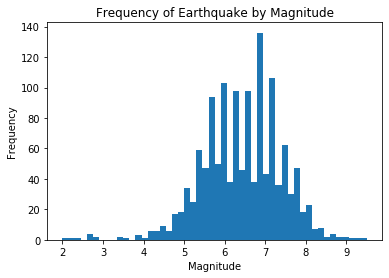

In [76]:
cleaned_df.Magnitude.plot('hist', bins=50)
plt.xlabel('Magnitude')
plt.title('Frequency of Earthquake by Magnitude');

In [77]:
# defining magnitude class
def magnitude_scale(column):
    if column['Magnitude']<=5:
        val='Light'
    elif column['Magnitude']<=6:
        val='Moderate'
    elif column['Magnitude']<=7:
        val='Strong'
    else:
        val='Major'
    return val

In [78]:
cleaned_df.tail()

,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Deaths,Year
1332,2011-03-24 20:25:00,Burma,NaN,NaN,NaN,6.8,NaN,NaN,NaN,150.0,2011
1333,2011-04-07 14:32:00,Japan,38.200,140.000,66.0,7.1,NaN,NaN,NaN,NaN,2011
1334,2011-09-18 12:40:00,India,27.723,88.064,19.7,6.9,L,NaN,NaN,111.0,2011
1335,2011-09-23 10:41:00,Turkey,38.600,43.500,7.2,7.1,NaN,NaN,NaN,601.0,2011
1336,2018-08-05 19:46:00,Indonesia,NaN,NaN,31.0,6.9,NaN,NaN,NaN,NaN,2018


In [79]:
#cleaned_df['Magnitude_Classes']=cleaned_df.apply(magnitude_scale,axis=1)

In [80]:
#cleaned_df['Magnitude_Classes'].value_counts(dropna=False)

In [81]:
#cleaned_df.groupby(['Country','Magnitude'])[['Deaths']].mean().sort_values(by='Deaths',ascending=False)

In [82]:
#cleaned_df=cleaned_df.sort_values('Magnitude', ascending=False)

In [83]:
#light=cleaned_df[cleaned_df.Magnitude_Classes=='Light']


In [84]:
#light.groupby(['Country','Magnitude_Classes','Deaths'])['Deaths'].count().sort_values(ascending=False)

In [85]:
cleaned_df.head()

,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Deaths,Year
0,1900-05-11 17:23:00,Japan,38.7,141.1,5.0,7.0,NaN,NaN,NaN,NaN,1900
1,1900-07-12 06:25:00,Turkey,40.3,43.1,NaN,5.9,NaN,NaN,NaN,140.0,1900
2,1900-10-29 09:11:00,Venezuela,11.0,-66.0,0.0,7.7,NaN,NaN,NaN,NaN,1900
3,1901-02-15 00:00:00,China,26.0,100.1,0.0,6.5,NaN,NaN,NaN,NaN,1901
4,1901-03-31 07:11:00,Bulgaria,43.4,28.7,NaN,6.4,NaN,NaN,NaN,4.0,1901


In [86]:
# cleaned_df[cleaned_df.Magnitude_Classes=='Major'].plot()
# plt.xlabel('Deaths')
# plt.ylabel('Magnitude')
# plt.title('Magnitude of Earthquake by Country');

In [87]:
#test =cleaned_df[cleaned_df.Magnitude_Classes]

In [88]:
#df secondary effect
secondary_effect=cleaned_df[cleaned_df['Deaths']!=0]

In [89]:
#calculating percent 
def percent_columns(x,y):
    """calculating percentage from two columns"""
    return (y/x)*100

In [90]:
# Creating secondary death column 
secondary_effect['secondary_deaths']=secondary_effect['PDE_Total_Deaths']-secondary_effect['PDE_Shaking_Deaths']

C:\Users\anami\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [91]:
# droppping null from secondary deaths
secondary_effect=secondary_effect[secondary_effect['secondary_deaths'].notnull()]

In [92]:
#dropping null from secondary effect
secondary_effect=secondary_effect[secondary_effect[ 'Secondary_Effects'].notnull()]

In [93]:
# selecting data where there is no 0 PDE Total Deaths
secondary_effect=secondary_effect[secondary_effect['PDE_Total_Deaths']!=0]


In [94]:
#calculating secondary death percentage
secondary_effect['secondary_deathp']=secondary_effect.apply(lambda row:percent_columns(row['PDE_Total_Deaths'],row['secondary_deaths']),axis=1)


In [95]:
#secondary_effect=secondary_effect.sort_values('Deaths',ascending=False)

In [96]:
#secondary_effect.groupby(['Country','Magnitude_Classes','Deaths'])['Deaths'].count().sort_values(ascending=False)

In [97]:
secondary_effect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 472 to 1309
Data columns (total 13 columns):
Date                  229 non-null object
Country               229 non-null object
Lat                   229 non-null float64
Long                  229 non-null float64
Depth_(km)            229 non-null float64
Magnitude             229 non-null float64
Secondary_Effects     229 non-null object
PDE_Shaking_Deaths    229 non-null float64
PDE_Total_Deaths      229 non-null float64
Deaths                229 non-null float64
Year                  229 non-null int64
secondary_deaths      229 non-null float64
secondary_deathp      229 non-null float64
dtypes: float64(9), int64(1), object(3)
memory usage: 25.0+ KB


In [98]:
#selecting data where secondary death % is not 0 and sorting values by number of Deaths
secondary_effect_sorted= secondary_effect[secondary_effect['secondary_deathp']!=0].sort_values('Deaths',ascending=False)
secondary_effect_sorted.head()

,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Deaths,Year,secondary_deaths,secondary_deathp
1304,2008-05-12 06:28:00,China,31.002,103.322,19.0,7.9,L,69195.0,88287.0,88287.0,2008,19092.0,21.624928
496,1970-05-31 20:23:00,Peru,-9.248,-78.840,73.0,7.9,L,0.0,70000.0,70000.0,1970,70000.0,100.000000
577,1976-06-25 19:18:00,Indonesia,-4.531,140.109,15.0,7.1,L,422.0,7422.0,7422.0,1976,7000.0,94.314201
978,1995-01-16 20:46:00,Japan,34.580,135.025,22.0,6.9,"L,F,Lq",5502.0,5530.0,6432.0,1995,28.0,0.506329
796,1987-03-06 04:10:00,Ecuador,0.082,-77.787,17.1,7.1,L,1000.0,5000.0,5000.0,1987,4000.0,80.000000


In [99]:
secondary_effect_sorted['Secondary_Effects'].value_counts()

L         46
T         11
T,L        8
L,Lq       2
Lq         1
L,F,Lq     1
F          1
T,LF       1
T,L,Lq     1
Name: Secondary_Effects, dtype: int64

In [100]:
secondary_effect_sorted.describe()

,Lat,Long,Depth_(km),Magnitude,PDE_Shaking_Deaths,PDE_Total_Deaths,Deaths,Year,secondary_deaths,secondary_deathp
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,11.509264,44.648931,42.443056,6.609722,1123.277778,2600.611111,2622.055556,1994.708333,1477.333333,73.778835
std,23.818140,94.979817,79.782352,1.038032,8164.503816,13180.169177,13182.398844,8.851573,8542.562145,34.137901
min,-45.240000,-122.004000,3.500000,3.800000,0.000000,1.000000,1.000000,1970.000000,1.000000,0.506329
25%,-6.076500,-71.363250,13.175000,5.875000,0.000000,2.000000,2.000000,1989.750000,1.750000,50.000000
50%,11.450000,71.976500,20.500000,6.650000,0.000000,9.500000,10.000000,1995.000000,5.000000,100.000000
75%,34.311500,132.595000,43.825000,7.300000,13.000000,110.250000,110.250000,2001.250000,43.000000,100.000000
max,50.031000,176.921000,631.000000,8.600000,69195.000000,88287.000000,88287.000000,2008.000000,70000.000000,100.000000


In [101]:
#Top ten
secondary_effect_ten= secondary_effect_sorted.head(10)

In [102]:
secondary_effect_ten.head()

,Date,Country,Lat,Long,Depth_(km),Magnitude,Secondary_Effects,PDE_Shaking_Deaths,PDE_Total_Deaths,Deaths,Year,secondary_deaths,secondary_deathp
1304,2008-05-12 06:28:00,China,31.002,103.322,19.0,7.9,L,69195.0,88287.0,88287.0,2008,19092.0,21.624928
496,1970-05-31 20:23:00,Peru,-9.248,-78.840,73.0,7.9,L,0.0,70000.0,70000.0,1970,70000.0,100.000000
577,1976-06-25 19:18:00,Indonesia,-4.531,140.109,15.0,7.1,L,422.0,7422.0,7422.0,1976,7000.0,94.314201
978,1995-01-16 20:46:00,Japan,34.580,135.025,22.0,6.9,"L,F,Lq",5502.0,5530.0,6432.0,1995,28.0,0.506329
796,1987-03-06 04:10:00,Ecuador,0.082,-77.787,17.1,7.1,L,1000.0,5000.0,5000.0,1987,4000.0,80.000000


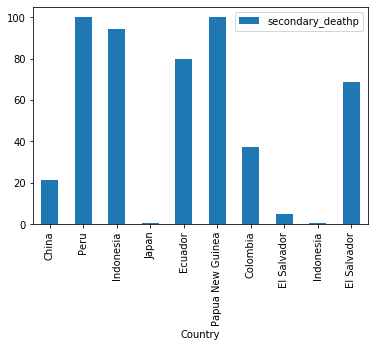

In [103]:
secondary_effect_ten.plot(x='Country', y = 'secondary_deathp',  kind = 'bar');

In [107]:
url='https://earthquake.usgs.gov/fdsnws/event/1/'

In [110]:
payload = {'format': 'csv'}
           

In [111]:
r = requests.get(url=url, params=payload)

In [112]:
print(r.url)

https://earthquake.usgs.gov/fdsnws/event/1/?format=csv


In [116]:
r.status_code

200

In [117]:
#First, we can read the text into a DataFrame using read_csv
#Another way to make it work is to pass the url itself to read_csv.
tn_earthquake = pd.read_csv(r.url)
eq.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 2


In [115]:
tn_earthquake = pd.read_csv(StringIO(r.text))
tn_earthquake.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 2
